In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv('../Data_Cleaning/Data/gurgaon_properties_outlier_treated.csv')

In [6]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,ss the leaf,sector 85,2.20,6934.0,3173.0,Super Built up area 2812(261.24 sq.m.),4.0,5.0,3+,4.0,East,Relatively New,2812.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,106.0,793.25
1,flat,m3m sierra 68,sector 68,1.08,8675.0,1245.0,Super Built up area 1245(115.66 sq.m.)Built Up...,2.0,2.0,3,1.0,West,Relatively New,1245.0,1130.0,930.0,0.0,0.0,0.0,0.0,0.0,0.0,149.0,622.50
2,flat,ashiana anmol,sohna road,0.99,8216.0,1205.0,Super Built up area 1205(111.95 sq.m.)Carpet a...,2.0,2.0,2,6.0,East,Undefined,1205.0,NaN,900.0,0.0,0.0,0.0,0.0,0.0,1.0,49.0,602.50
3,house,independent,sector 38,8.00,25616.0,3123.0,Built Up area: 347 (32.24 sq.m.)Carpet area: 2...,10.0,10.0,3+,1.0,North,Undefined,NaN,347.0,215.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,312.30
4,flat,puri diplomatic greens,sector 111,3.70,12542.0,2950.0,Super Built up area 2950(274.06 sq.m.)Built Up...,4.0,5.0,3+,12.0,South-East,Relatively New,2950.0,2650.0,2450.0,0.0,1.0,0.0,0.0,0.0,0.0,158.0,737.50


In [7]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1071
agePossession             0
super_built_up_area    1761
built_up_area          2049
carpet_area            1766
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

# Built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

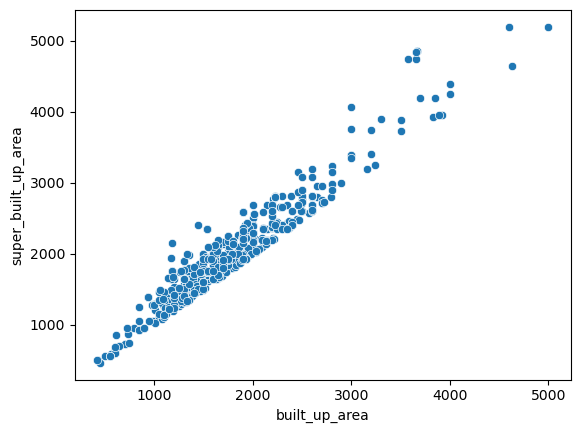

In [8]:
sns.scatterplot(x=df['built_up_area'], y=df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

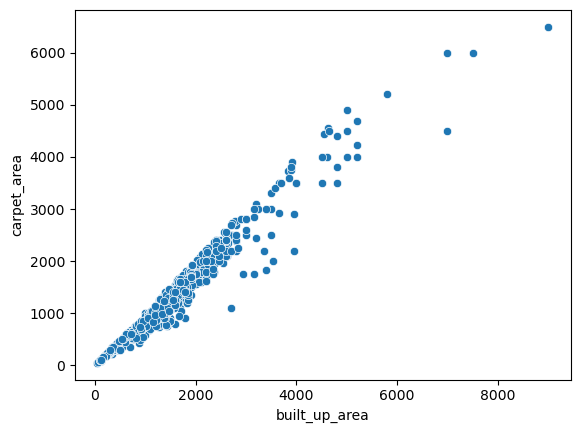

In [9]:
sns.scatterplot(x=df['built_up_area'], y=df['carpet_area'])

In [10]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3671    False
3672    False
3673    False
3674    False
3675    False
Length: 3676, dtype: bool

In [11]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [12]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [13]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [14]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.1048701298701298 0.900140056022409


In [15]:
# Both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [16]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.104) + (sbc_df['carpet_area']/0.9))/2), inplace=True)

C:\Users\atulk\AppData\Local\Temp\ipykernel_16364\1486295156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.104) + (sbc_df['carpet_area']/0.9))/2), inplace=True)


In [17]:
df.update(sbc_df)

In [18]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1071
agePossession             0
super_built_up_area    1761
built_up_area          1621
carpet_area            1766
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [19]:
# sb present c is null build up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [20]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.104), inplace=True)

C:\Users\atulk\AppData\Local\Temp\ipykernel_16364\2344692647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.104), inplace=True)


In [21]:
df.update(sb_df)

In [22]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1071
agePossession             0
super_built_up_area    1761
built_up_area           718
carpet_area            1766
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [23]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [24]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\atulk\AppData\Local\Temp\ipykernel_16364\2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)


In [25]:
df.update(c_df)

In [26]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1071
agePossession             0
super_built_up_area    1761
built_up_area             0
carpet_area            1766
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

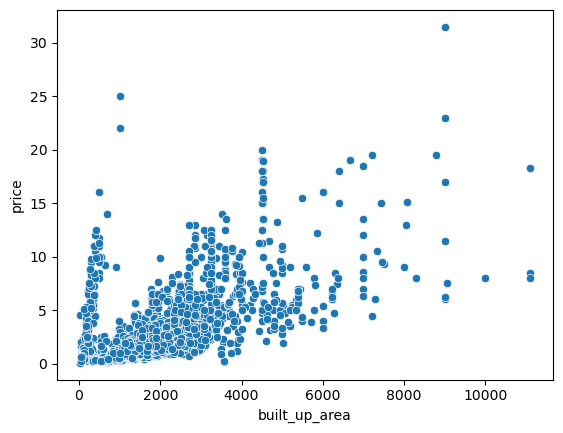

In [27]:
sns.scatterplot(x=df['built_up_area'], y=df['price'])

In [28]:
sus_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price', 'area', 'built_up_area']]

In [29]:
sus_df['built_up_area'] = sus_df['area']

In [30]:
df.update(sus_df)

<Axes: xlabel='built_up_area', ylabel='price'>

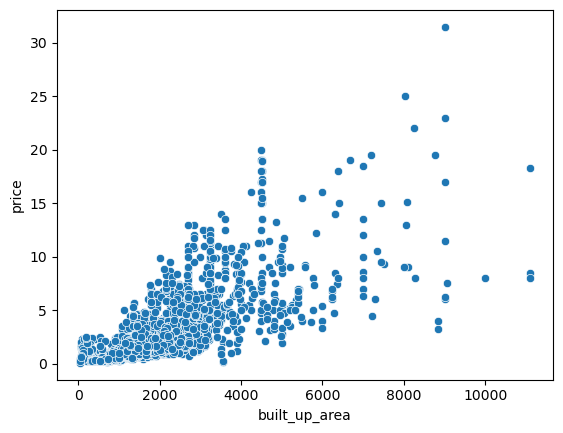

In [31]:
sns.scatterplot(x=df['built_up_area'], y=df['price'])

In [32]:
df.drop(columns=['area', 'areaWithType', 'super_built_up_area', 'carpet_area', 'area_room_ratio'], inplace=True)

In [33]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ss the leaf,sector 85,2.20,6934.0,4.0,5.0,3+,4.0,East,Relatively New,2547.0,0.0,0.0,0.0,0.0,0.0,1.0,106.0
1,flat,m3m sierra 68,sector 68,1.08,8675.0,2.0,2.0,3,1.0,West,Relatively New,1130.0,0.0,0.0,0.0,0.0,0.0,0.0,149.0
2,flat,ashiana anmol,sohna road,0.99,8216.0,2.0,2.0,2,6.0,East,Undefined,1046.0,0.0,0.0,0.0,0.0,0.0,1.0,49.0
3,house,independent,sector 38,8.00,25616.0,10.0,10.0,3+,1.0,North,Undefined,3123.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,flat,puri diplomatic greens,sector 111,3.70,12542.0,4.0,5.0,3+,12.0,South-East,Relatively New,2650.0,0.0,1.0,0.0,0.0,0.0,0.0,158.0


In [34]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1071
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

# floorNum

In [35]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
198,house,independent,sector 4,0.65,11111.0,4.0,2.0,2,NaN,NaN,Moderately Old,585.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
547,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,2,NaN,East,Moderately Old,3240.0,0.0,1.0,1.0,1.0,0.0,1.0,88.0
560,house,independent,sector 2,5.60,17284.0,8.0,6.0,3+,NaN,South-West,Moderately Old,3240.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
683,house,ansal sushant lok,sector 43,10.50,27911.0,4.0,4.0,2,NaN,North-East,Old Property,3762.0,0.0,1.0,0.0,0.0,0.0,1.0,59.0
1357,flat,NaN,sector 78,0.60,3692.0,2.0,2.0,0,NaN,NaN,Under Construction,1625.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1572,house,emaar mgf marbella,sector 66,9.00,21251.0,4.0,4.0,3+,NaN,South-West,Relatively New,5200.0,0.0,1.0,1.0,1.0,0.0,0.0,114.0
1629,house,dlf new town heights,sector 86,2.47,7719.0,4.0,4.0,3+,NaN,West,Moderately Old,2800.0,0.0,1.0,0.0,1.0,0.0,0.0,130.0
1963,house,independent,sector 24,1.45,2984.0,3.0,3.0,1,NaN,NaN,Old Property,540.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0
1966,house,jacob pura,sector 12,0.35,9722.0,2.0,1.0,0,NaN,NaN,Old Property,360.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2258,house,independent,sector 7,6.50,15046.0,3.0,2.0,3+,NaN,NaN,Old Property,4320.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0


In [36]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [37]:
df['floorNum'].fillna(2.0, inplace=True)

In [38]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1071
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

# facing

<Axes: ylabel='count'>

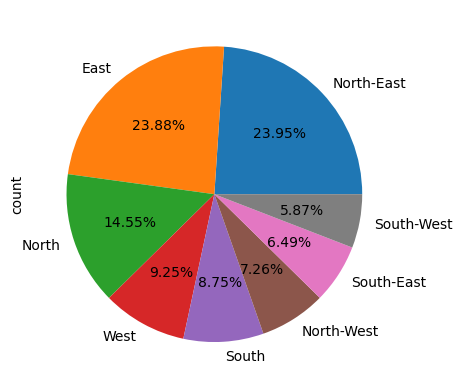

In [39]:
df['facing'].value_counts().plot(kind='pie', autopct='%0.2f%%')

In [40]:
df.drop(columns=['facing'], inplace=True)

In [41]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3086,flat,bestech park view grand spa,sector 81,2.20,8271.0,3.0,4.0,3+,8.0,Relatively New,2482.0,0.0,1.0,0.0,0.0,0.0,0.0,165.0
46,flat,conscient elevate,sector 59,4.25,18519.0,3.0,4.0,3,3.0,Under Construction,2079.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1724,flat,godrej nature plus,sector 33,1.65,14335.0,2.0,2.0,3,1.0,Under Construction,1279.0,0.0,0.0,0.0,0.0,0.0,1.0,38.0
85,flat,tulip violet,sector 69,1.43,9039.0,3.0,3.0,2,1.0,Relatively New,1429.0,0.0,0.0,0.0,1.0,0.0,1.0,102.0
413,flat,zara aavaas,sector 104,0.20,6645.0,1.0,1.0,1,3.0,Undefined,301.0,0.0,0.0,0.0,0.0,0.0,1.0,67.0


In [42]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1357,flat,NaN,sector 78,0.6,3692.0,2.0,2.0,0,2.0,Under Construction,1625.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:
df.drop(index=[1357], inplace=True)

In [44]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

# agePossession

In [45]:
df['agePossession'].value_counts()

agePossession
Relatively New        1633
New Property           590
Moderately Old         556
Undefined              468
Old Property           299
Under Construction     129
Name: count, dtype: int64

In [46]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2,flat,ashiana anmol,sohna road,0.99,8216.0,2.0,2.0,2,6.0,Undefined,1046.0,0.0,0.0,0.0,0.0,0.0,1.0,49.0
3,house,independent,sector 38,8.00,25616.0,10.0,10.0,3+,1.0,Undefined,3123.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,house,satya the hermitage,sector 103,3.15,6702.0,4.0,5.0,0,12.0,Undefined,4700.0,0.0,0.0,0.0,0.0,0.0,1.0,61.0
11,house,independent,sector 3,0.90,8929.0,3.0,1.0,0,1.0,Undefined,1008.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14,flat,tulip petals,sector 89,1.10,7097.0,3.0,2.0,3,4.0,Undefined,1550.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3634,house,independent,sector 9,0.22,7407.0,2.0,2.0,2,1.0,Undefined,37.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3636,flat,raheja navodaya,sector 92,1.10,4681.0,3.0,2.0,3,0.0,Undefined,2350.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3645,flat,signature global infinity mall,sector 36,0.41,6269.0,2.0,2.0,3,3.0,Undefined,654.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3654,flat,smart world orchard,sector 61,1.60,13913.0,2.0,2.0,2,3.0,Undefined,1278.0,1.0,0.0,0.0,0.0,0.0,1.0,37.0


In [47]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [48]:
df['agePossession'] = df.apply(mode_based_imputation, axis=1)

In [49]:
df['agePossession'].value_counts()

agePossession
Relatively New        1830
New Property           672
Moderately Old         604
Old Property           336
Under Construction     131
Undefined              102
Name: count, dtype: int64

In [50]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [51]:
df['agePossession'] = df.apply(mode_based_imputation2, axis=1)

In [52]:
df['agePossession'].value_counts()

agePossession
Relatively New        1846
New Property           701
Moderately Old         611
Old Property           350
Under Construction     131
Undefined               36
Name: count, dtype: int64

In [53]:
def mode_based_imputation3(row):
    if row["agePossession"] == "Undefined":
        mode_value = df[(df["property_type"] == row["property_type"])]["agePossession"].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row["agePossession"]

In [54]:
df['agePossession'] = df.apply(mode_based_imputation3, axis=1)

In [55]:
df['agePossession'].value_counts()

agePossession
Relatively New        1859
New Property           701
Moderately Old         634
Old Property           350
Under Construction     131
Name: count, dtype: int64

In [56]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [57]:
df


,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ss the leaf,sector 85,2.20,6934.0,4.0,5.0,3+,4.0,Relatively New,2547.0,0.0,0.0,0.0,0.0,0.0,1.0,106.0
1,flat,m3m sierra 68,sector 68,1.08,8675.0,2.0,2.0,3,1.0,Relatively New,1130.0,0.0,0.0,0.0,0.0,0.0,0.0,149.0
2,flat,ashiana anmol,sohna road,0.99,8216.0,2.0,2.0,2,6.0,Relatively New,1046.0,0.0,0.0,0.0,0.0,0.0,1.0,49.0
3,house,independent,sector 38,8.00,25616.0,10.0,10.0,3+,1.0,Relatively New,3123.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,flat,puri diplomatic greens,sector 111,3.70,12542.0,4.0,5.0,3+,12.0,Relatively New,2650.0,0.0,1.0,0.0,0.0,0.0,0.0,158.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3671,flat,parsvnath green ville,sector 48,1.60,8377.0,3.0,3.0,3,13.0,Old Property,1700.0,0.0,0.0,0.0,0.0,1.0,0.0,119.0
3672,flat,unitech greenwood city,sector 45,2.40,12346.0,3.0,3.0,2,1.0,New Property,196.0,0.0,1.0,0.0,0.0,0.0,0.0,19.0
3673,flat,breez global heights,sohna road,0.39,4105.0,2.0,2.0,2,3.0,Relatively New,720.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3674,flat,dlf park place,sector 54,5.75,24689.0,3.0,4.0,3,12.0,Relatively New,2329.0,0.0,1.0,0.0,0.0,0.0,2.0,174.0


In [58]:
# df.to_csv('../Data_Cleaning/Data/gurgaon_properties_missing_values_impute.csv', index=False)